В этом модели буду использовать RandomForestClassifier, так как он явлвяется одним из самых популярных алгоритмов машинного обучения для классификации.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

ImportError: initialization failed

In [2]:
train_df = pd.read_csv("train_edit2.csv")
valid_df = pd.read_csv("valid_edit2.csv")
# train_df = pd.read_csv("../AC/trein.csv")
# validation_df = pd.read_csv("../AC/val.csv")

Распределяем данные на обучающую и тестовую выборки

In [3]:
X_train = train_df.drop(columns=["target"])
y_train = train_df["target"]

X_val = valid_df.drop(columns=["target"])
y_val = valid_df["target"]

Ставим параметры для модели

In [4]:
param = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

Используем GridSearchCV для поиска лучших параметров

In [5]:
model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param,
    cv=5,
    scoring='roc_auc',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=2)

In [6]:
# Лучшая модель после поиска
best_model = grid_search.best_estimator_
print("Лучшие параметры:", grid_search.best_params_)

Лучшие параметры: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


Выводим получившиеся результаты

In [7]:
y_prob = best_model.predict_proba(X_val)[:, 1]

#ROC curve
roc_auc = roc_auc_score(y_val, y_prob)
print(f'ROC-AUC на тестовой метрики {roc_auc:.4f}')

#Метрики
y_pred = best_model.predict(X_val)
print('Accuracy:', accuracy_score(y_val, y_pred))
print('Confusin matrix:', confusion_matrix(y_val, y_pred))
print('Classification report:', classification_report(y_val, y_pred))

ROC-AUC на тестовой метрики 0.7096
Accuracy: 0.9818780889621087
Confusin matrix: [[3576    0]
 [  66    0]]
Classification report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3576
           1       0.00      0.00      0.00        66

    accuracy                           0.98      3642
   macro avg       0.49      0.50      0.50      3642
weighted avg       0.96      0.98      0.97      3642



c:\Users\Darin_btw\Documents\GitHub\2_Intensiv_2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Darin_btw\Documents\GitHub\2_Intensiv_2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Darin_btw\Documents\GitHub\2_Intensiv_2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Выводим результаты Roc-кривой

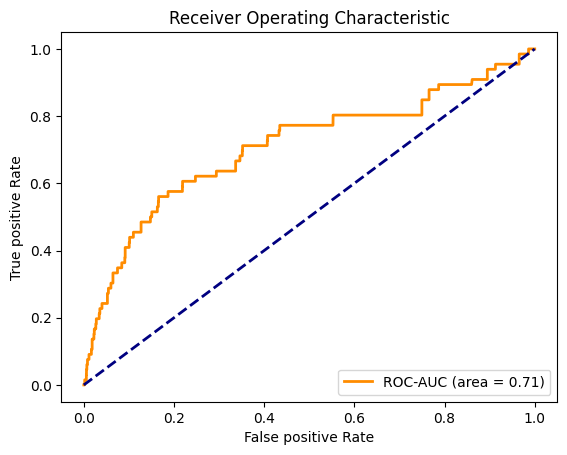

In [8]:
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC-AUC (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()